In [25]:
import pandas as pd
import numpy as np


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline





def histogram(df, col_name, total_rows, x_label, x_labels, title, figsize):
    # Convert the column to numeric, handling non-numeric values as NaN
    numeric_data = pd.to_numeric(df[col_name], errors='coerce')
    nan_count = numeric_data.isnull().sum()
    percentage_non_numeric = (nan_count / total_rows) * 100
    print(f"Percentage of non-numerical values in the '{col_name}' column: {percentage_non_numeric:.2f}%")

    # Get value counts for unique values
    value_counts = df[col_name].value_counts()

    # Calculate the percentage of each unique value
    percentages = (value_counts / total_rows) * 100

    



def survival_percentage(data, column_name):
    unique_values = data[column_name].unique()
    
    percentages = {}
    
    for value in unique_values:
        subset = data[data[column_name] == value]
        survived_count = subset["Survived"].sum()
        total_count = len(subset)
        if total_count > 0:
            percentage = (survived_count / total_count) * 100
            percentages[value] = percentage
    
    return percentages

def survival_percentage_continuous(data, column_name, num_bins=None, bin_labels=None):
    if num_bins is None:
        num_bins = 10  # Default number of bins if not specified
    
    if bin_labels is None:
        bin_labels = [f'Bin {i+1}' for i in range(num_bins)]  # Default bin labels
    
    # Create bins for the specified column
    data['bins'] = pd.cut(data[column_name], bins=num_bins, labels=bin_labels)
    
    # Calculate survival percentages for each bin
    bin_percentages = {}
    
    for bin_label in bin_labels:
        subset = data[data['bins'] == bin_label]
        survived_count = subset['Survived'].sum()
        total_count = len(subset)
        
        if total_count > 0:
            percentage = (survived_count / total_count) * 100
            bin_percentages[bin_label] = percentage
            
            # Remove the 'bins' column from the DataFrame (optional)
    data.drop(columns=['bins'], inplace=True)
    

def pie_chart(percentages):
    labels = percentages.keys()
    sizes = list(percentages.values())  # Convert dict_values to a list
    
    # Generate a list of shades of blue based on the number of categories
    num_categories = len(labels)
    colors = plt.cm.Blues(np.linspace(0.1, 1, num_categories))
    
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.pie(sizes, labels=None, colors=colors, autopct=lambda p: f'{p:.1f}%' if p > 0 else '', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Survival Percentage by Category')
    
    # Add custom legend
    legend_labels = [f'{label} ({sizes[i]:.1f}%)' for i, label in enumerate(labels) if sizes[i] > 0]
    plt.legend(legend_labels, loc='best')
    
    plt.show()

def find_between(s, first, last):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

def percent(col_name, total_rows):
    numeric_data = pd.to_numeric(df[col_name], errors='coerce')
    nan_count = numeric_data.isnull().sum()
    percentage_non_numeric = (nan_count / total_rows) * 100
    print(f"Percentage of non-numerical values in the '{col_name}' column: {percentage_non_numeric:.2f}%")

    # Get unique values in the 'previous' column
    unique_values = df[col_name].unique()
    print("Unique values in '{col_name}' column:")
    
    # Calculate the percentage of each unique value
    percentage_values = []
    for value in unique_values:
        count = (df[col_name] == value).sum()
        percentage = (count / total_rows) * 100
        percentage_values.append(percentage)
        print(f"Value: {value}, Percentage: {percentage:.2f}%")

def get_null_percentage(dataframe):
    # Calculate the total number of rows in the DataFrame
    total_rows = len(dataframe)
    
    # Calculate the percentage of null values for each feature
    null_percentage = (dataframe.isnull().sum() / total_rows) * 100
    
    return null_percentage




def fill_null_with_mode(dataframe, column_name):
    # Calculate the mode of the column
    mode_value = dataframe[column_name].mode().iloc[0]
    
    # Fill null values with the mode
    dataframe[column_name].fillna(mode_value, inplace=True)

df = pd.read_csv('/home/harsh/Downloads/tested.csv')

print(df.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                         

In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
print(df.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [12]:
features = ['Pclass','Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']
null_percentage = get_null_percentage(df[features])

# Print the null percentage for each feature
print("Percentage of null values for each feature:")
print(null_percentage,"%")

Percentage of null values for each feature:
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
Survived     0.000000
dtype: float64 %


In [10]:
df.drop(columns=['Cabin'], inplace=True)
df.drop(columns=['Age'], inplace=True)

In [11]:
# Remove 'Cabin' and 'Age' from the features list in one line
features = [feature for feature in features if feature not in ['Cabin', 'Age']]

# Print the updated features list
print(features)


['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Survived']


precentage of male who survived: 0.00%
precentage of female who survived: 100.00%


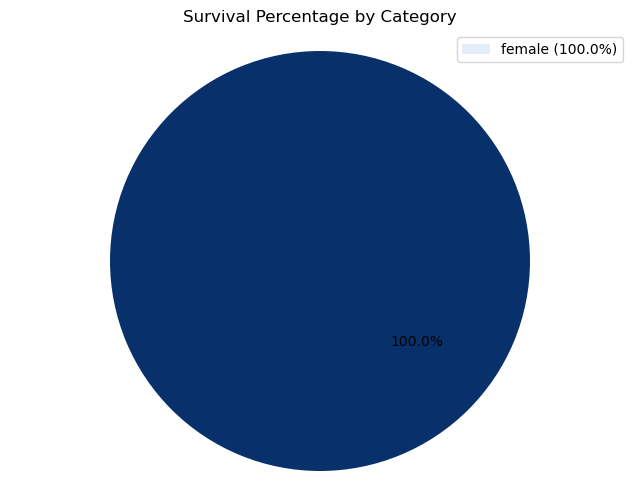

In [13]:
sex_result = survival_percentage(df, "Sex")

for key, value in sex_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")
    
draw_pie_chart(sex_result)


In [14]:
df['Title'] = df.apply(lambda row: find_between(row['Name'], ", ", "."), axis=1)
features.append('Title')
df.drop(columns=['Name'], inplace=True)
print(df['Title'])

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


In [16]:
# Remove 'Name' from the features list
features.remove('Name')

# Print the updated features list
print(features)

['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Survived', 'Title']


In [24]:
title_result = survival_percentage(df, "Title")

for key, value in title_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")
    
draw_pie_chart(title_result)   

NameError: name 'survival' is not defined

In [19]:
df.drop(columns=['Title'], inplace=True)
features.remove('Title')
print(features)

['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Survived']


precentage of Q who survived: 52.17%
precentage of S who survived: 32.59%
precentage of C who survived: 39.22%


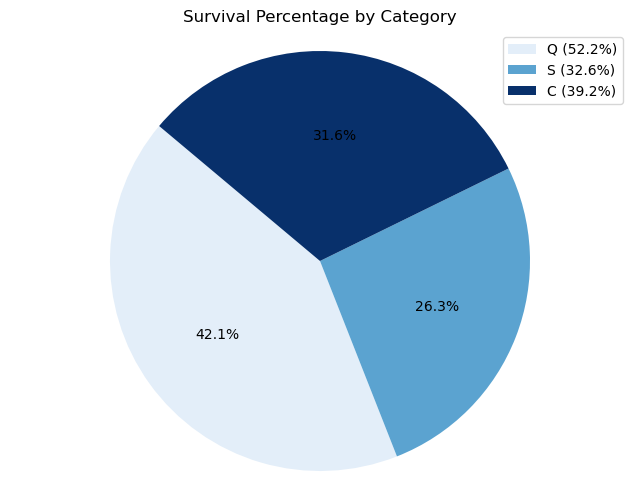

In [23]:
embarked_result = survival_percentage(df, "Embarked")

for key, value in embarked_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")
    
draw_pie_chart(embarked_result)

precentage of 3 who survived: 33.03%
precentage of 2 who survived: 32.26%
precentage of 1 who survived: 46.73%


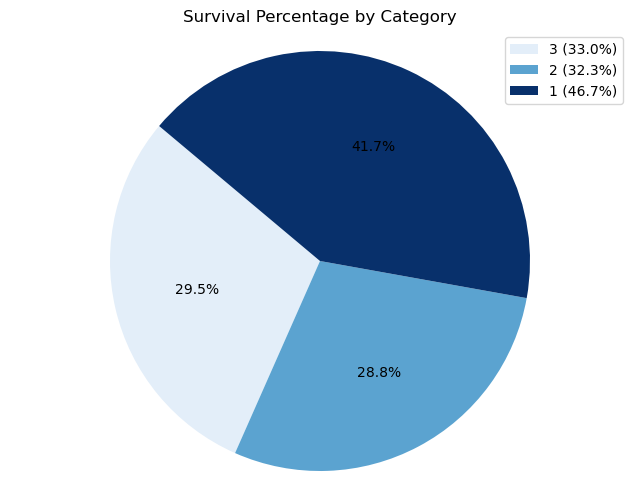

In [24]:
embarked_result = survival_percentage(df, "Pclass")

for key, value in embarked_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")
    
draw_pie_chart(embarked_result)

precentage of 0 who survived: 31.10%
precentage of 1 who survived: 49.09%
precentage of 2 who survived: 42.86%
precentage of 3 who survived: 25.00%
precentage of 4 who survived: 25.00%
precentage of 5 who survived: 100.00%
precentage of 8 who survived: 50.00%


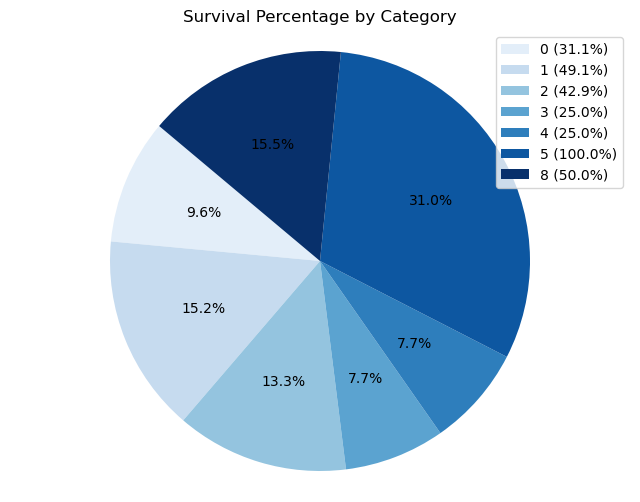

In [25]:
SibSp_result = survival_percentage(df, "SibSp")

for key, value in SibSp_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")
    
draw_pie_chart(SibSp_result)

precentage of 0 who survived: 30.56%
precentage of 1 who survived: 53.85%
precentage of 3 who survived: 66.67%
precentage of 2 who survived: 60.61%
precentage of 4 who survived: 100.00%
precentage of 6 who survived: 0.00%
precentage of 5 who survived: 0.00%
precentage of 9 who survived: 50.00%


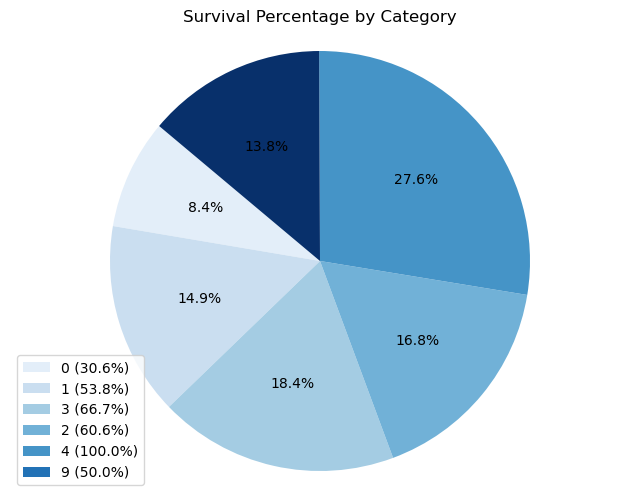

In [26]:
Parch_result = survival_percentage(df, "Parch")

for key, value in Parch_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")
    
draw_pie_chart(Parch_result)